# Effects of Borrower Categories on the Borrower APR
## by Job Wachira

## Investigation Overview

The goal of this investigation is to determine how different categorical variables affect the borrower APR.
For this instance, our focus will be on how the custom prosper score, income range and home ownership interact with the borrower APR.


My key insignt will be that the Prosper Score, income range and homeownership all have an effect on the borrower APR one can get. The higher your prosper score, the lower your APR. The higher your income range the lower the APR you get and home owners seem to on average enjoy a lower APR across listing categories.



## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

'''Carry out some preliminary wrangling to get the data to it's desired state
this will include  subsetting for variables of interest and dropping null values 
although more changes will happen as we continue with the plots.'''

loans_df = loans.copy()

#subset for only variables of interest and supporting variables
loans_df = loans_df.loc[:,['LoanOriginationDate','Term','BorrowerAPR','BorrowerRate','ProsperScore','ListingCategory (numeric)','Occupation','EmploymentStatus','IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper','IncomeRange', 'OpenCreditLines', 'OpenRevolvingAccounts','LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome']]

#drop missing values to remain with a complete subset for visualistion
loans_df.dropna(inplace = True)

loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LoanOriginationDate        83520 non-null  object 
 1   Term                       83520 non-null  int64  
 2   BorrowerAPR                83520 non-null  float64
 3   BorrowerRate               83520 non-null  float64
 4   ProsperScore               83520 non-null  float64
 5   ListingCategory (numeric)  83520 non-null  int64  
 6   Occupation                 83520 non-null  object 
 7   EmploymentStatus           83520 non-null  object 
 8   IsBorrowerHomeowner        83520 non-null  bool   
 9   CreditScoreRangeLower      83520 non-null  float64
 10  CreditScoreRangeUpper      83520 non-null  float64
 11  IncomeRange                83520 non-null  object 
 12  OpenCreditLines            83520 non-null  float64
 13  OpenRevolvingAccounts      83520 non-null  in

## Borrower APR by Prosper Score.

The *Prosper Score* is a custom risk score built using historical prosper data. It goes from 1 to 10 with 1 being the highest risk level and 10 the lowest.

We investigate it's relationship with the borrower APR by plotting a box plot so that we can see the change in the median borrower APR for the different prosper scores.

We can notice a drop in the prosper score as we move from lower prosper scores to higher ones. This is an indication that historical data greatly influences the borrowr APR one can get.


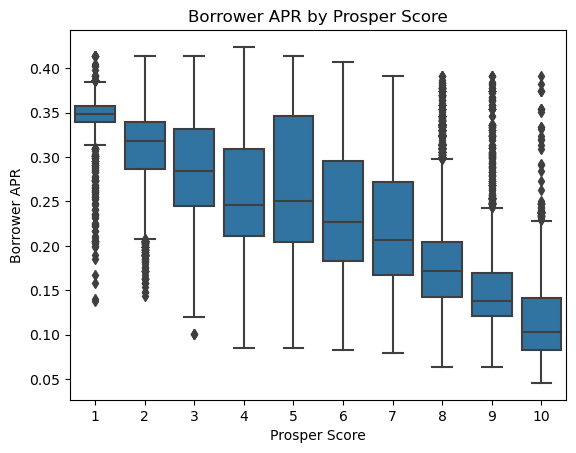

In [3]:
base_color = sb.color_palette()[0]

prosper_scores = [x for x in range(1,11)]

ps_class = pd.api.types.CategoricalDtype(ordered=True, categories=prosper_scores)

loans_df['ProsperScore'] = loans_df['ProsperScore'].astype(ps_class)

sb.boxplot(data=loans_df, x='ProsperScore', y='BorrowerAPR', color=base_color)

plt.title('Borrower APR by Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR');


## Borrower APR by Income Range and Term

Here we show the borrower API for different terms faceted by income range. 

By faceting using income range, we can see how the median borrower APR drops as we go up the income ranges. It's important to note, however, that loans with a 36 month term seem to have a higher APR, probably because they constitue the bulk of loans and have more variability. However, even for that term, there is a decrease in the borrower APR as you move to higher income ranges.

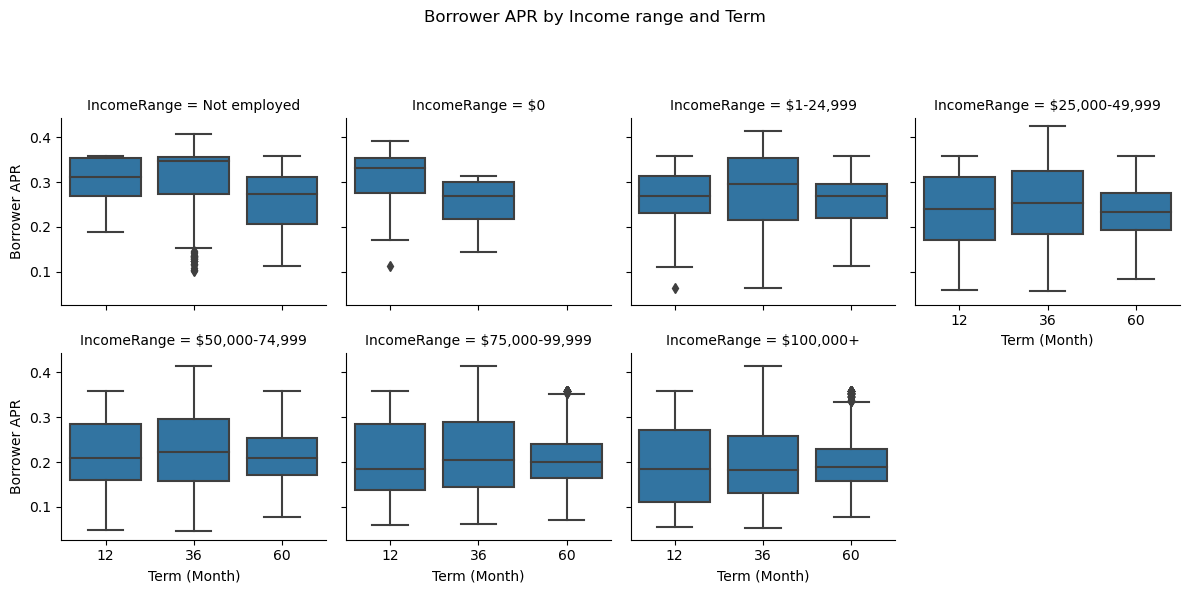

In [4]:
#create a variable to use in creating a categorical type 
income_ranges = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']

income_classes = pd.api.types.CategoricalDtype(ordered=True, categories=income_ranges)

#convert the dtype of IncomeRange to a categorical type
loans_df['IncomeRange'] = loans_df['IncomeRange'].astype(income_classes)

# draw boxplots showing the relationship between Term and BorrowerAPR, faceted by IncomeRange
fig_3 = sb.FacetGrid(data=loans_df, col='IncomeRange', col_wrap=4)

fig_3.map(sb.boxplot,'Term','BorrowerAPR')

fig_3.set_xlabels('Term (Month)')
fig_3.set_ylabels('Borrower APR')

fig_3.fig.subplots_adjust(top=0.8) # adjust the Figure in fig_3
fig_3.fig.suptitle('Borrower APR by Income range and Term');


## Borrower APR by Listing Category and Home Ownership

Here we are going to measure the mean borrower APR for different listing categories, split by homwownership.

We notice that on the left column, the for all listing categories, we have lighter shades than the right column. By annotating the cells of the heatmap, we can clearly see that across all categories, the mean borrower APR is lower for those who own homes than for those who do not.



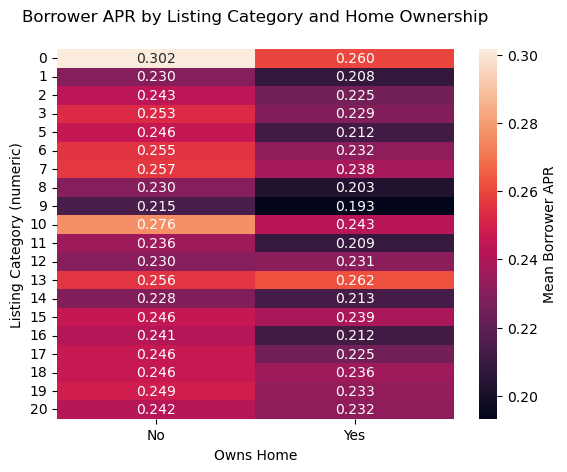

In [5]:
cat_APR_mean = loans_df.groupby(['IsBorrowerHomeowner', 'ListingCategory (numeric)'])['BorrowerAPR'].mean()
cat_APR_mean = cat_APR_mean.reset_index(name = 'APR_mean')
cat_APR_mean = cat_APR_mean.pivot(index = 'ListingCategory (numeric)',columns = 'IsBorrowerHomeowner', values = 'APR_mean')
sb.heatmap(cat_APR_mean, annot=True, fmt='.3f', cbar_kws = {'label':'Mean Borrower APR'})

#Format plots
plt.title('Borrower APR by Listing Category and Home Ownership', pad=20)
plt.ylabel('Listing Category (numeric)')
plt.xlabel('Owns Home')
plt.yticks(rotation = 0)
plt.xticks(ticks = [0.5,1.5],labels = ['No','Yes']);


In [6]:
!jupyter nbconvert Prosperloans_Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Prosperloans_Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 768076 bytes to Prosperloans_Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Mobius\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Mobius\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\Mobius\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Mobius\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Mobius\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_fi